# John's EDA

### **Importing Modules**

In [109]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### **Retrieving data and Formatting**

In [110]:
#Reading and Filtering Files
counties = pd.read_csv("Data_Raw\\us-counties.csv", index_col=['date'])
header=['date', 'county', 'state', 'fips', 'cases', 'deaths']
dates = pd.DatetimeIndex(counties.index)
dates=dates.strftime('%B-%d')
counties.index=dates
counties.head()
#len(counties)

,county,state,fips,cases,deaths
date,,,,,
January-21,Snohomish,Washington,"53,061.00",1,0
January-22,Snohomish,Washington,"53,061.00",1,0
January-23,Snohomish,Washington,"53,061.00",1,0
January-24,Cook,Illinois,"17,031.00",1,0
January-24,Snohomish,Washington,"53,061.00",1,0


### **Generating Data Frame for Cases by State**

In [3]:
# Step 1: Summing all the cases on April 15 in California
total = 0
filtered = counties[(counties.index=='April-15')&(counties['state']=='California')]['cases']
for i in range(0,len(filtered)):
    #print(counties[(counties.index==each)&(counties['state']=='California')]['cases'][i])
    total += counties[(counties.index=='April-15')&(counties['state']=='California')]['cases'][i]
print("Cases in California on April 15:", total)

Cases in California on April 15: 27107


# Instruction -> turn this cell to code, otherwise, expect waiting time
# Step 2: Summing all the cases on all dates in 5 states (took John 1+ minutes to load)

states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington']
#states = ['California']  <- tried it on California first to match step 1
cases={}
for state in states:
    cases_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['cases'][i]
        cases_list.append(total)
    cases[state]=cases_list

# Instruction -> turn this cell to code, otherwise, expect waiting time
# Step 3: Summing all the cases on all dates in all states (took John 7+ minutes to load)

states = list(counties.state.unique())
#states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington'] #<- this was used in step 2
#states = ['California']  #<- tried it on California first to match step 1
cases={}
for state in states:
    cases_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['cases'][i]
        cases_list.append(total)
    cases[state]=cases_list


In [24]:
#Creating a separate data frame for Date and number of cases reported in each of the 55 unique states
states = list(counties.state.unique())

data = {'calendar':list(counties.index.unique())}
for state in states:
    data[state] = cases[state]
    
cases_by_state = pd.DataFrame(data)
cases_by_state

,calendar,Washington,Illinois,California,Arizona,Massachusetts,Wisconsin,Texas,Nebraska,Utah,...,Alaska,Maine,Alabama,Idaho,Montana,Puerto Rico,Virgin Islands,Guam,West Virginia,Northern Mariana Islands
0,January-21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,January-22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,January-23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,January-24,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,January-25,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,April-11,10224,19183,22421,3393,22860,3213,13206,719,2221,...,255,616,3262,1407,377,788,51,681,593,11
82,April-12,10411,20855,23323,3539,25475,3341,13774,806,2303,...,270,633,3583,1426,387,897,51,716,615,11
83,April-13,10538,22028,24334,3702,26867,3428,14488,871,2399,...,275,698,3805,1453,394,897,51,716,638,11
84,April-14,10694,23247,25758,3806,28163,3555,15304,931,2418,...,283,734,3953,1464,399,897,51,721,697,11


### **Generating Data Frame for Deaths by State**

# Instruction -> turn this cell to code, otherwise, expect waiting time
# Repeat previous section for cases but for deaths

states = list(counties.state.unique())
deaths={}
for state in states:
    deaths_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['deaths']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['deaths'][i]
        deaths_list.append(total)
    deaths[state]=deaths_list


In [38]:
#Creating a separate data frame for Date and number of cases reported in each of the 55 unique states
states = list(counties.state.unique())
data2 = {'calendar':list(counties.index.unique())}
for state in states:
    data2[state] = deaths[state]
    
deaths_by_state = pd.DataFrame(data2)
deaths_by_state

,calendar,Washington,Illinois,California,Arizona,Massachusetts,Wisconsin,Texas,Nebraska,Utah,...,Alaska,Maine,Alabama,Idaho,Montana,Puerto Rico,Virgin Islands,Guam,West Virginia,Northern Mariana Islands
0,January-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,January-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,January-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,January-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,January-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,April-11,498,682,632,112,686,141,266,18,18,...,6,19,93,27,6,42,1,5,6,2
82,April-12,511,727,676,117,756,145,289,18,18,...,6,19,93,27,6,44,1,5,8,2
83,April-13,525,800,725,122,844,155,320,19,18,...,6,19,104,33,7,45,1,6,9,2
84,April-14,552,878,778,131,957,172,365,21,19,...,7,20,114,39,7,45,1,6,10,2


## **Data Minification**
Save the final dataframes as pickle files.

In [44]:
cases_by_state.to_pickle('Data_pkl\\cases_by_state.pkl')
deaths_by_state.to_pickle('Data_pkl\\deaths_by_state.pkl')

Read Pickle Files

In [45]:
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')

## **Initial Plots**

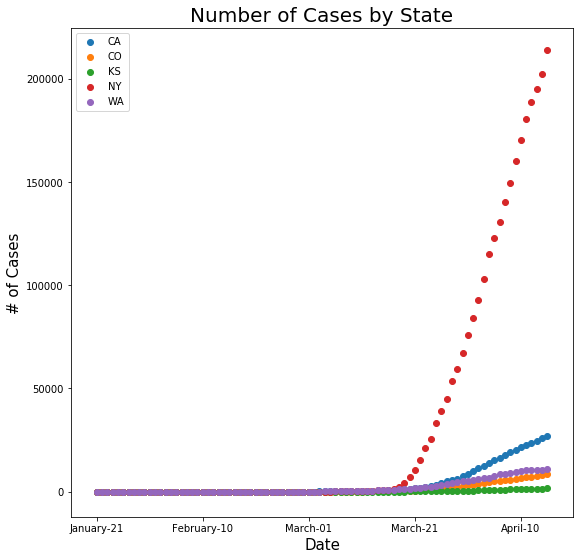

In [47]:
# Cases by State Plots
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(df1.calendar,df1.California)
axs.scatter(df1.calendar,df1.Colorado)
axs.scatter(df1.calendar,df1.Kansas)
axs.scatter(df1.calendar,df1['New York'])
axs.scatter(df1.calendar,df1.Washington)


#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

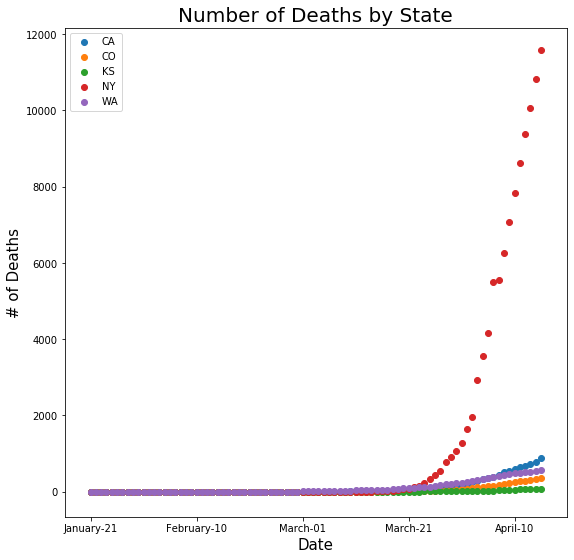

In [48]:
# Deaths by State Plots
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(df2.calendar,df2.California)
axs.scatter(df2.calendar,df2.Colorado)
axs.scatter(df2.calendar,df2.Kansas)
axs.scatter(df2.calendar,df2['New York'])
axs.scatter(df2.calendar,df2.Washington)


#Labeling
axs.set_title("Number of Deaths by State", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

### **Retrieving data and Formatting Part 2 - Population & Density**

In [116]:
#Reading and Filtering Files
population = pd.read_csv("Data_Raw\\population_by_zip_2010.csv")
population.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.00,34.00,female,61747,8600000US61747
1,5,85.00,nan,male,64120,8600000US64120
2,1389,30.00,34.00,male,95117,8600000US95117
3,231,60.00,61.00,female,74074,8600000US74074
4,56,0.00,4.00,female,58042,8600000US58042


In [118]:
population_byzip = population[['zipcode','population']]
population_byzip.head()

,zipcode,population
0,61747,50
1,64120,5
2,95117,1389
3,74074,231
4,58042,56


In [128]:
#Reading and Filtering Files
# Zip and county code
fips_zip = pd.read_excel("Data_Raw\\fips_zip4\ZIP_COUNTY_032020.xlsx")
counties_2 = pd.read_csv("Data_Raw\\us-counties.csv")
counties_2["date"] = pd.to_datetime(counties_2["date"])
counties_2["date"] = counties_2["date"].dt.strftime('%B-%d')
counties_2.head()

,date,county,state,fips,cases,deaths
0,January-21,Snohomish,Washington,"53,061.00",1,0
1,January-22,Snohomish,Washington,"53,061.00",1,0
2,January-23,Snohomish,Washington,"53,061.00",1,0
3,January-24,Cook,Illinois,"17,031.00",1,0
4,January-24,Snohomish,Washington,"53,061.00",1,0


In [142]:
fips_zip = fips_zip[['ZIP','COUNTY']]
fips_zip.head()

,ZIP,COUNTY
0,501,36103
1,601,72113
2,601,72001
3,602,72003
4,602,72005


In [143]:
len(fips_zip)

54181

In [140]:
len(population_byzip)

1622831

In [132]:
pop_updated = population_byzip.merge(fips_zip, how='left', left_on='zipcode', right_on='ZIP')
pop_updated.head()

,zipcode,population,ZIP,COUNTY
0,61747,50,"61,747.00","17,179.00"
1,64120,5,"64,120.00","29,095.00"
2,95117,1389,"95,117.00","6,085.00"
3,74074,231,"74,074.00","40,119.00"
4,58042,56,"58,042.00","38,017.00"


In [141]:
len(pop_updated)

2342347

In [147]:
counties_2_cases = counties_2[counties_2.date=='April-15'][['fips','cases']]
counties_2_cases.head()

,fips,cases
59249,"1,001.00",25
59250,"1,003.00",98
59251,"1,005.00",13
59252,"1,007.00",19
59253,"1,009.00",17


In [148]:
pop_cases = pop_updated.merge(counties_2_cases, how='left', left_on='COUNTY', right_on='fips')
pop_cases

,zipcode,population,ZIP,COUNTY,fips,cases
0,61747,50,"61,747.00","17,179.00","17,179.00",21.00
1,64120,5,"64,120.00","29,095.00","29,095.00",243.00
2,95117,1389,"95,117.00","6,085.00","6,085.00","1,793.00"
3,74074,231,"74,074.00","40,119.00","40,119.00",29.00
4,58042,56,"58,042.00","38,017.00","38,017.00",135.00
...,...,...,...,...,...,...
2485863,28640,66,"28,640.00","37,009.00","37,009.00",4.00
2485864,98604,791,"98,604.00","53,011.00","53,011.00",258.00
2485865,29545,55,"29,545.00","45,051.00","45,051.00",150.00
2485866,45319,10,"45,319.00","39,023.00","39,023.00",21.00


In [168]:
pop_cases_10k = pop_cases[pop_cases.population>10000]
len(pop_cases_10k)

29078

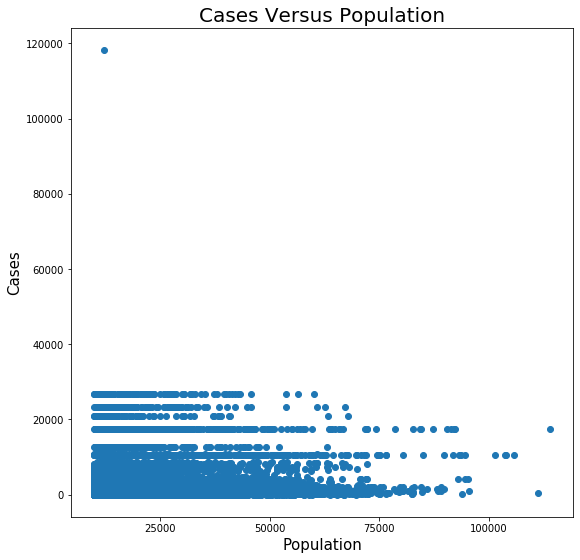

In [169]:
# Cases by Population
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(pop_cases_10k.population,pop_cases_10k.cases)


#Labeling
axs.set_title("Cases Versus Population", fontsize=20)
axs.set_ylabel('Cases', fontsize=15)
axs.set_xlabel('Population', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))


In [164]:
pop_cases_10k

,zipcode,population,ZIP,COUNTY,fips,cases
352602,90201,101279,"90,201.00","6,037.00","6,037.00","10,496.00"
432263,90011,103892,"90,011.00","6,037.00","6,037.00","10,496.00"
448616,60629,113916,"60,629.00","17,031.00","17,031.00","17,306.00"
1058201,11373,100820,"11,373.00","36,081.00",nan,nan
1088742,79936,111086,"79,936.00","48,141.00","48,141.00",346.00
1103074,91331,103689,"91,331.00","6,037.00","6,037.00","10,496.00"
1141887,90650,105549,"90,650.00","6,037.00","6,037.00","10,496.00"
1186084,11226,101572,"11,226.00","36,047.00",nan,nan
1226087,926,108862,926.00,"72,021.00",nan,nan
1226088,926,108862,926.00,"72,127.00",nan,nan
